# Machine Learning in R

In [1]:
library(caret)
library(kernlab)
library(randomForest)
library(ellipse)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




In [2]:
filename <- "iris.csv"

# load the CSV file from the local directory

In [3]:
dataset <- read.csv(filename, header=FALSE)

# set the column names in the dataset

In [4]:
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [18]:
dataset$Species

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
  [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [26] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [31] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [36] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [41] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [46] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [51] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [56] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [61] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [66] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [71] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [76] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [81] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
 [86] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
 [91] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
 [96] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[101] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[106] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[111] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[116] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [20]:
dataset$Species= as.factor(dataset$Species)
dataset$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

# create a list of 80% of the rows in the original dataset we can use for training

In [44]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# select 20% of the data for validation

In [45]:
validation <- dataset[-validation_index,]

# use the remaining 80% of data to training and testing the models

In [46]:
dataset <- dataset[validation_index,]

# dimensions of dataset

In [47]:
dim(dataset)

[1] 96  5

# list types for each attribute

In [48]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

# take a peek at the first 5 rows of the data

In [22]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


# list the levels for the class

In [23]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

# summarize the class distribution

In [24]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


# summarize attribute distributions

In [25]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.856   Mean   :3.052   Mean   :3.759   Mean   :1.203  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

# split input and output

In [26]:
x <- dataset[,1:4]
y <- dataset[,5]

# boxplot for each attribute on one image

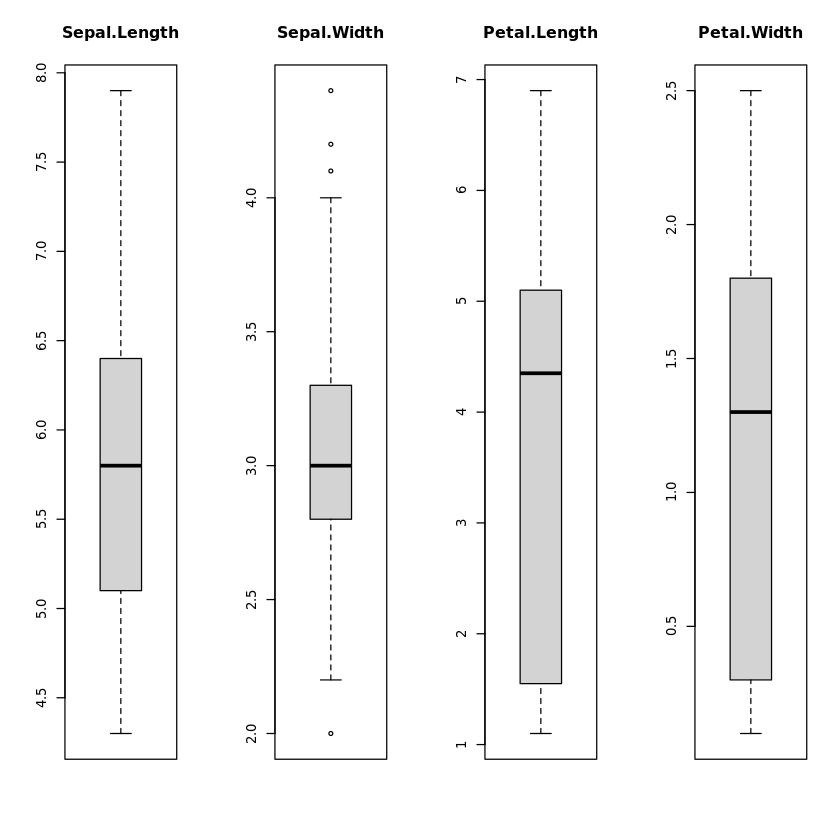

In [27]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

# barplot for class breakdown

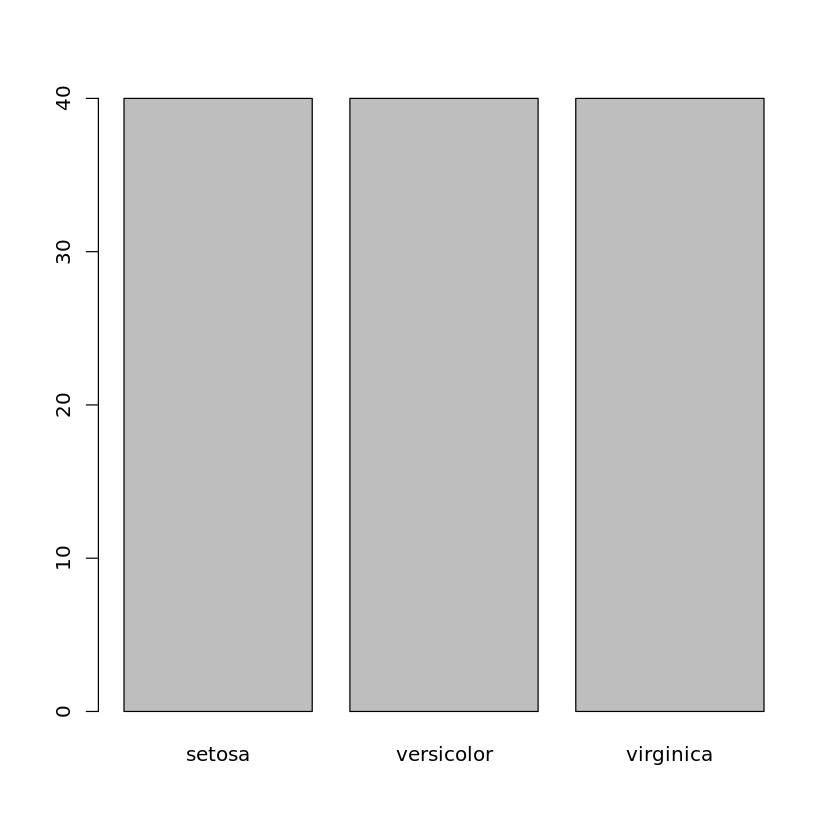

In [30]:
plot(y)

# scatterplot matrix

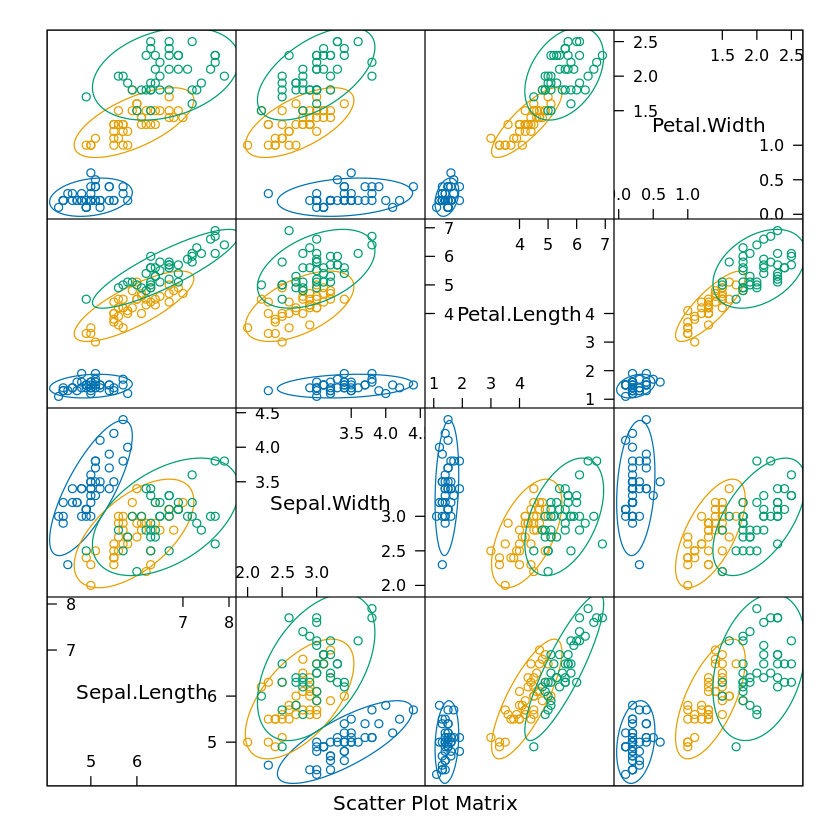

In [29]:
featurePlot(x=x, y=y, plot="ellipse")

# box and whisker plots for each attribute

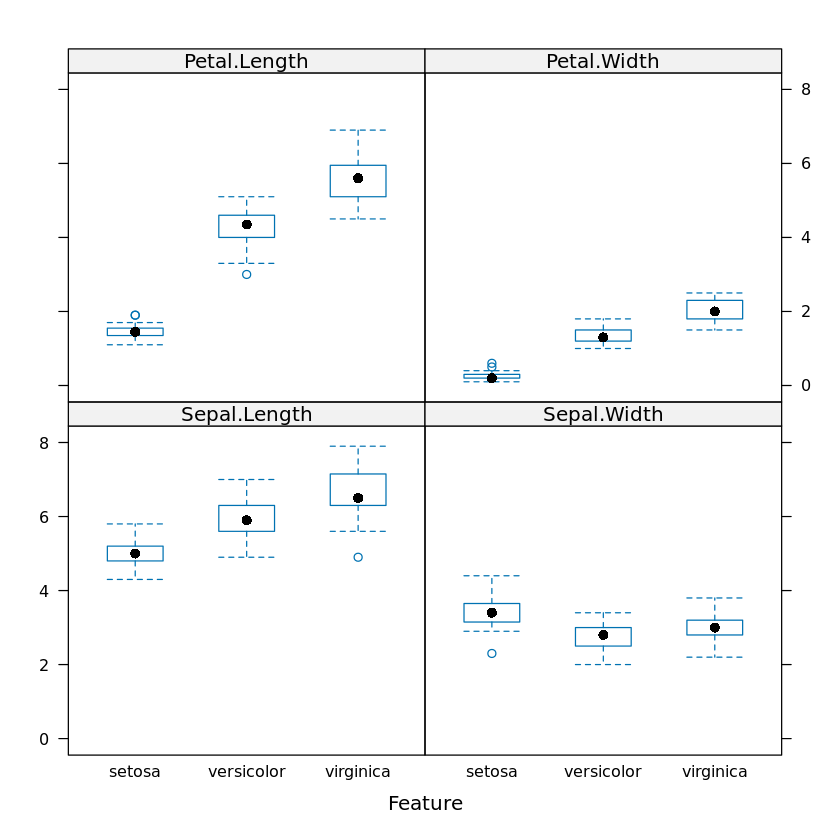

In [31]:
featurePlot(x=x, y=y, plot="box")

# density plots for each attribute by class value

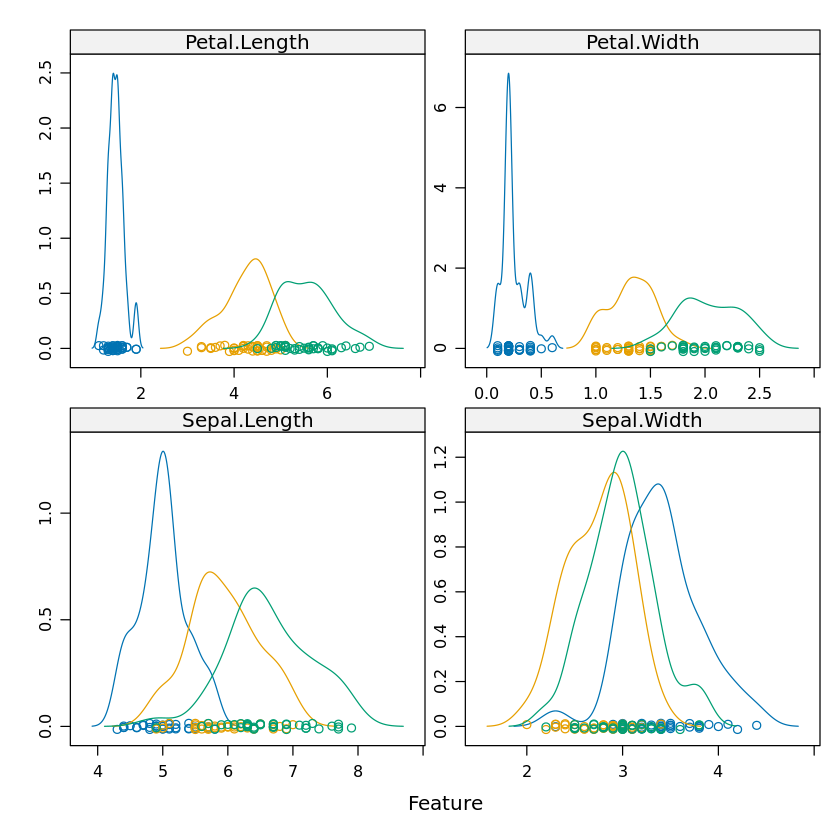

In [32]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

# Run algorithms using 10-fold cross validation

In [33]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# a) linear algorithms

In [34]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) nonlinear algorithms
# CART

In [35]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

# kNN

In [36]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

# c) advanced algorithms
# SVM

In [37]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

# Random Forest

In [38]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

# summarize accuracy of models

In [39]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 0.9375000 1.0000000 0.9666667       1    1    0
cart 0.8333333 0.9166667 0.9166667 0.9333333       1    1    0
knn  0.8333333 0.9375000 1.0000000 0.9583333       1    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333       1    1    0
rf   0.8333333 0.9166667 0.9166667 0.9416667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 0.90625 1.0000 0.9500       1    1    0
cart 0.750 0.87500 0.8750 0.9000       1    1    0
knn  0.750 0.90625 1.0000 0.9375       1    1    0
svm  0.875 0.87500 0.9375 0.9375       1    1    0
rf   0.750 0.87500 0.8750 0.9125       1    1    0


# compare accuracy of models

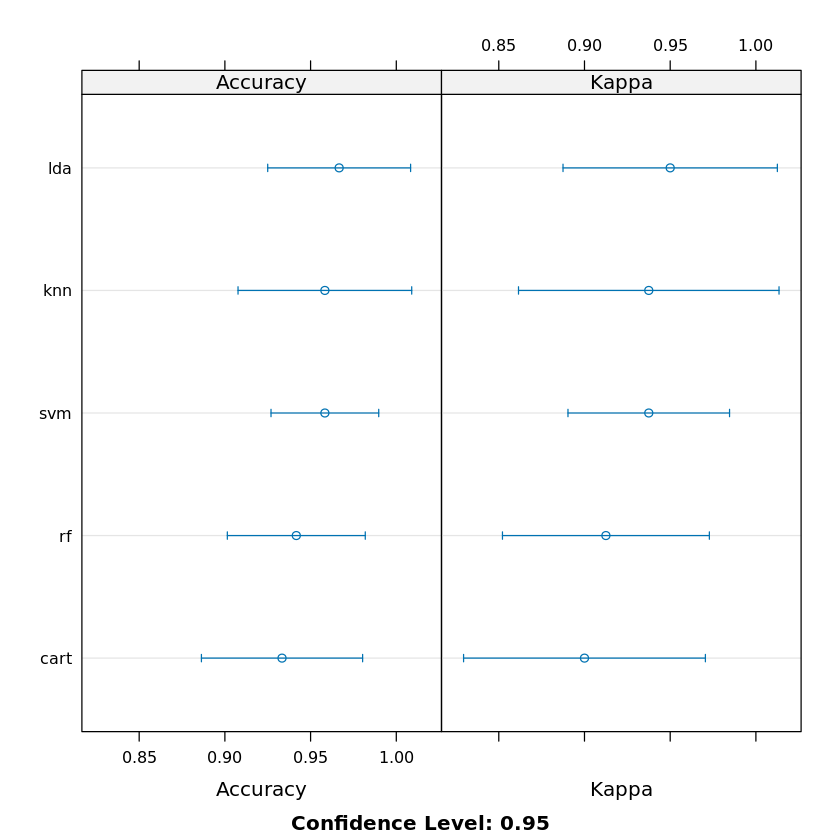

In [40]:
dotplot(results)

# summarize Best Model

In [41]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9666667  0.95 



# estimate skill of LDA on the validation dataset

In [49]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          8         0
  virginica       0          0         8

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8575, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 3.541e-12  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            